In [ ]:
!pip install -y opencv torch onnx protobuf 

In [ ]:
# 데이터 준비 
# BDD dataset 으로 준비

import requests
ZIP_FILE_NAME = "bdd.zip"


# 다운로드 링크 받아오기
link = requests.get('https://2x5kv9t5uf.execute-api.us-west-2.amazonaws.com/production?func=create_download_challenge_link&filename=bdd-attention%2FBDDA.zip', allow_redirects=True)

# Stream 으로 다운받기 
r = requests.get(link.content.decode('utf-8')[1:-1], stream=True)

# iteration 돌면서 파일로 저장하기 
with open(f"assets/{ZIP_FILE_NAME}", 'wb') as fd:
    for chunk in r.iter_content(chunk_size=8192):
        fd.write(chunk)

# 압축 풀기

!unzip "assets/{ZIP_FILE_NAME}"

In [ ]:
# 웹캠 준비
# ref) https://linuxconfig.org/how-to-test-webcam-on-ubuntu-20-04-focal-fossa

# 운영체제가 카메라를 인식하고 있는지 확인
!echo "dmesg 결과"
!dmesg | grep -i "Camera"

# 사용 가능한 webcam list 확인
!echo "video 장치 확인 결과"
!ls -ltrh /dev/video*

# python 에서 buffer 를 읽을 수 있는지 확인
print("장치에 접근 가능한지 확인")
open("/dev/video2", "rb") 

# issue index 로 장치를 열 수 없는 문제 발생
# permission 이 없는 문제로 permission 을 777로 줘서 해결
# ref) https://askubuntu.com/questions/1229254/webcam-not-working-ubuntu-18-04

read: assets/BDDA/validation/camera_videos/2000.mp4


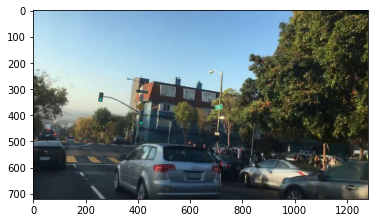

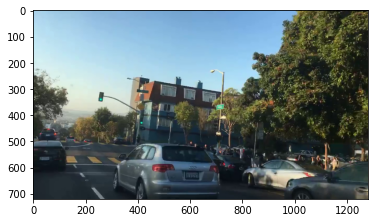

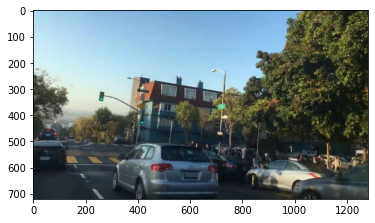

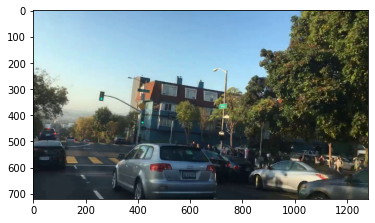

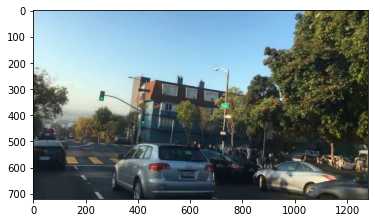

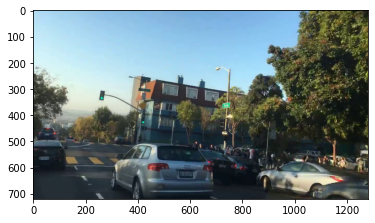

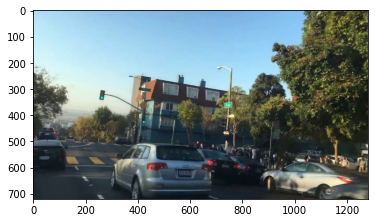

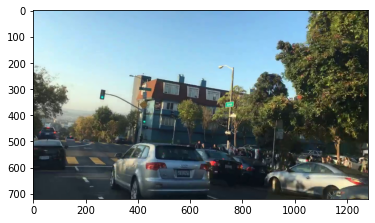

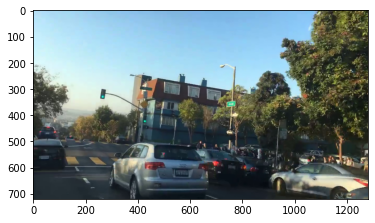

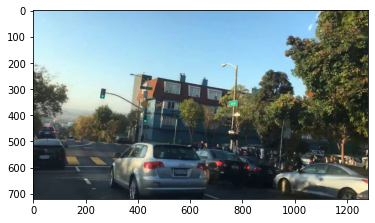

In [1]:
# 영상에서 Frame 추출

import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

WEBCAM_MODE = False
if (WEBCAM_MODE):
    capture = cv2.VideoCapture(1)
    print("read from webcam")
else:
    PATH_TO_INPUT_VIDEO_PATH = f"assets/BDDA/validation/camera_videos/2000.mp4"  
    capture = cv2.VideoCapture(PATH_TO_INPUT_VIDEO_PATH)
    print("read: " + PATH_TO_INPUT_VIDEO_PATH)

if(capture.isOpened() == False):
    print("Error opening video stream or file")

index = 0
while(capture.isOpened()):
    # type ndarray
    # shape (720, 1280, 3)
    ret, frame = capture.read()
    if ret == True:
        index += 1
        plt.figure()
        plt.imshow(frame[:,:,::-1])
        if index >= 10:
            break
    else:
        break


capture.release()
cv2.destroyAllWindows()


In [ ]:
open("/dev/video0", "rb") 

In [ ]:
!python3 yolov5/export.py --weights yolov5s.pt --img 640 --batch 1 

In [ ]:
# import onnx 
# onnx_model = onnx.load("")

In [ ]:
!pip uninstall protobuf python3-protobuf
!pip install --upgrade pip
!pip install --upgrade protobuf

YOLOv5 🚀 v5.0-486-gba99092 torch 1.9.0+cu102 CPU



read: assets/BDDA/validation/camera_videos/2000.mp4
video 1/1 (1/300) /home/lemarais/Projects/chang/assets/BDDA/validation/camera_videos/2000.mp4: 0
640x640 3 persons, 10 cars, 1 traffic light, Done. (1.938s)
video 1/1 (2/300) /home/lemarais/Projects/chang/assets/BDDA/validation/camera_videos/2000.mp4: 1
640x640 6 persons, 10 cars, 2 traffic lights, Done. (1.911s)
video 1/1 (3/300) /home/lemarais/Projects/chang/assets/BDDA/validation/camera_videos/2000.mp4: 2
640x640 4 persons, 10 cars, 1 traffic light, Done. (1.895s)
video 1/1 (4/300) /home/lemarais/Projects/chang/assets/BDDA/validation/camera_videos/2000.mp4: 3
640x640 9 persons, 9 cars, 1 traffic light, Done. (1.905s)
video 1/1 (5/300) /home/lemarais/Projects/chang/assets/BDDA/validation/camera_videos/2000.mp4: 4
640x640 8 persons, 11 cars, 1 traffic light, Done. (1.895s)
video 1/1 (6/300) /home/lemarais/Projects/chang/assets/BDDA/validation/camera_videos/2000.mp4: 5
640x640 8 persons, 10 cars, 1 traffic light, Done. (1.916s)
video 

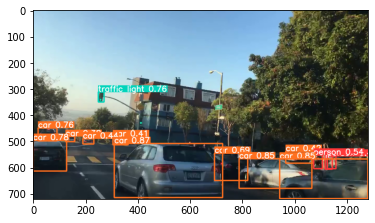

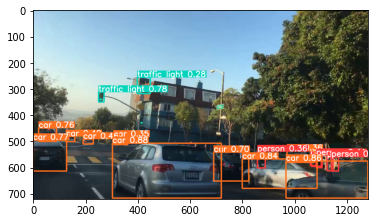

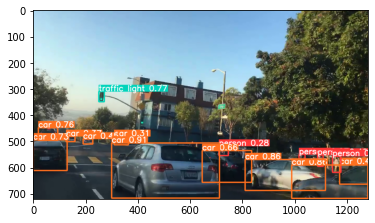

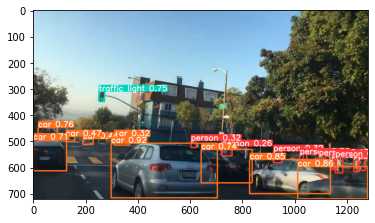

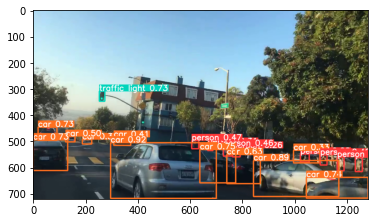

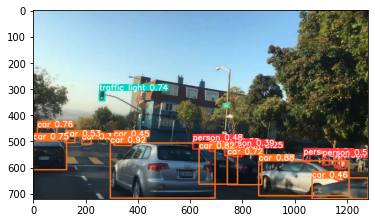

In [3]:
import argparse
import sys
from pathlib import Path

import cv2
import numpy as np
import torch
import torch.backends.cudnn as cudnn
from pathlib import Path

ROOT = Path().resolve()

if str(ROOT / "yolov5") not in sys.path:
    sys.path.append(str(ROOT / "yolov5"))  # add ROOT to PATH
ROOT = ROOT.relative_to(Path.cwd())  # relative

from models.experimental import attempt_load
from utils.datasets import LoadImages, LoadStreams
from utils.general import apply_classifier, check_img_size, check_imshow, check_requirements, check_suffix, colorstr, \
    increment_path, non_max_suppression, print_args, save_one_box, scale_coords, set_logging, \
    strip_optimizer, xyxy2xywh
from utils.plots import Annotator, colors
from utils.torch_utils import load_classifier, select_device, time_sync

import matplotlib.pyplot as plt
%matplotlib inline

WEBCAM_MODE = False
if (WEBCAM_MODE):
    source = '1'
    print("read from webcam")
else:
    source = f"assets/BDDA/validation/camera_videos/2000.mp4"  
    print("read: " + source)
    

weights = "yolov5s.onnx"
imgsz=640  # inference size (pixels)
conf_thres=0.25  # confidence threshold
iou_thres=0.45  # NMS IOU threshold
max_det=1000  # maximum detections per image
device='cpu'  # cuda device, i.e. 0 or 0,1,2,3 or cpu
view_img=False,  # show results
save_conf=False,  # save confidences in --save-txt labels
save_crop=False  # save cropped prediction boxes
classes=None  # filter by class: --class 0, or --class 0 2 3
agnostic_nms=False  # class-agnostic NMS
line_thickness=3  # bounding box thickness (pixels)
hide_labels=False  # hide labels
hide_conf=False  # hide confidences
webcam = source.isnumeric() or source.endswith('.txt') or source.lower().startswith(
    ('rtsp://', 'rtmp://', 'http://', 'https://'))


# Initialize
set_logging()
device = select_device(device)

# Load model
w = weights[0] if isinstance(weights, list) else weights
classify, suffix, suffixes = False, Path(w).suffix.lower(), ['.pt', '.onnx', '.tflite', '.pb', '']
check_suffix(w, suffixes)  # check weights have acceptable suffix
pt, onnx, tflite, pb, saved_model = (suffix == x for x in suffixes)  # backend booleans
stride, names = 64, [f'class{i}' for i in range(1000)]  # assign defaults

check_requirements(('onnx', 'onnxruntime'))
import onnxruntime
session = onnxruntime.InferenceSession(w, None)
imgsz = check_img_size(imgsz, s=stride)  # check image size

names = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

# Dataloader
if webcam:
    cudnn.benchmark = True  # set True to speed up constant image size inference
    dataset = LoadStreams(source, img_size=imgsz, stride=stride, auto=pt)
    bs = len(dataset)  # batch_size
else:
    dataset = LoadImages(source, img_size=imgsz, stride=stride, auto=pt)
    bs = 1  # batch_size
vid_path, vid_writer = [None] * bs, [None] * bs

# Run inference
if pt and device.type != 'cpu':
    model(torch.zeros(1, 3, *imgsz).to(device).type_as(next(model.parameters())))  # run once
dt, seen = [0.0, 0.0, 0.0], 0

index = 0
for path, img, im0s, vid_cap in dataset:
    print(index)
    if (index > 5):
        break
    index += 1
    t1 = time_sync()
    img = img.astype('float32')
    img = img / 255.0  # 0 - 255 to 0.0 - 1.0
    if len(img.shape) == 3:
        img = img[None]  # expand for batch dim
    t2 = time_sync()
    dt[0] += t2 - t1

    pred = torch.tensor(session.run([session.get_outputs()[0].name], {session.get_inputs()[0].name: img}))

    t3 = time_sync()
    dt[1] += t3 - t2

    # NMS
    pred = non_max_suppression(pred, conf_thres, iou_thres, classes, agnostic_nms, max_det=max_det)
    dt[2] += time_sync() - t3

    # Second-stage classifier (optional)
    if classify:
        pred = apply_classifier(pred, modelc, img, im0s)

    # Process predictions
    for i, det in enumerate(pred):  # per image
        seen += 1
        if webcam:  # batch_size >= 1
            p, s, im0, frame = path[i], f'{i}: ', im0s[i].copy(), dataset.count
        else:
            p, s, im0, frame = path, '', im0s.copy(), getattr(dataset, 'frame', 0)

        p = Path(p)  # to Path
        s += '%gx%g ' % img.shape[2:]  # print string
        gn = torch.tensor(im0.shape)[[1, 0, 1, 0]]  # normalization gain whwh
        imc = im0.copy() if save_crop else im0  # for save_crop
        annotator = Annotator(im0, line_width=line_thickness, example=str(names))
        if len(det):
            # Rescale boxes from img_size to im0 size
            det[:, :4] = scale_coords(img.shape[2:], det[:, :4], im0.shape).round()

            # Print results
            for c in det[:, -1].unique():
                n = (det[:, -1] == c).sum()  # detections per class
                s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string

            # Write results
            for *xyxy, conf, cls in reversed(det):
                xywh = (xyxy2xywh(torch.tensor(xyxy).view(1, 4)) / gn).view(-1).tolist()  # normalized xywh
                line = (cls, *xywh, conf) if save_conf else (cls, *xywh)  # label format
                c = int(cls)  # integer class
                label = None if hide_labels else (names[c] if hide_conf else f'{names[c]} {conf:.2f}')
                annotator.box_label(xyxy, label, color=colors(c, True))
        # Print time (inference-only)
        print(f'{s}Done. ({t3 - t2:.3f}s)')

        # Stream results
        im0 = annotator.result()
        if view_img:
            plt.figure()
            plt.imshow(im0[:,:,::-1])

